# seaborn入門

データの可視化はなぜ必要なのでしょうか。それは、そのデータを生み出している事象をより正確に理解したり、機械学習での予測に用いる際に、使うべきデータを適切に選んだりするためです。そのためにはまず、データを可視化することによって、データの大まかな特徴をつかんだり、データ同士の相関関係を知ることが必要です。

さて、Pythonでデータを可視化する際には、まず、Pandasでデータを集計・加工します。その上で、matplotlib（マットプロットリブ）や今回ご紹介するseaborn（シーボーン）というライブラリで可視化を行います。seabornは特に、手軽に美しく可視化ができるライブラリなので、本稿でseabornがいかに魅力的なライブラリであるかを学びましょう。

**目次**


1.   seabornの特徴
2.   seabornのインストール
3.   seabornによるデータの可視化入門
4.   まとめ





## seabornの特徴

seabornとは、Pythonのデータ可視化ライブラリで、同じPythonの可視化ライブラリであるmatplotlibが内部で動いています。この節では、seabornの長所と短所について、matplotlibと比較しながら解説していきます。

**seabornの長所**

*   洗練された図を描くことができる
*   matplotlibと比べて少ないコードで図が描ける

以上の２点が、matplotlibと比較した際のseabornの長所と言えるでしょう。ここでは、実際にmatplotlibとseabornで図を描いて比較してみます。なお、seabornの実装については、本稿を通してじっくり解説していきますので、ここではコードは気にしなくて構いません。

以下では、例としてtipsというサンプルのデータセットを元に、violinplot（ヴァイオリンプロット）と呼ばれるグラフを描きます。このtipsデータセットは、あるレストランにおいて店員が受け取ったチップと、その客の支払い金額や性別、食事をした曜日等の関連するデータを集めたものとなっています。ここでは曜日(day)ごとに支払い金額(total_bill)の分布を調べてみます。なお、violinplotの詳細については後述します。



In [ ]:
#分析の下準備
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
tips = sns.load_dataset('tips')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


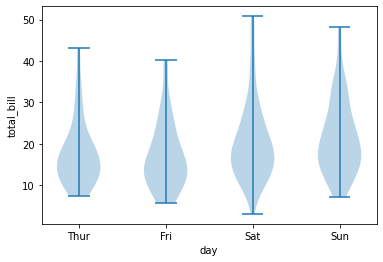

In [ ]:
#matplotlibでヴァイオリンプロットを描く
x1 = tips[tips['day'] == 'Thur']['total_bill'].values.tolist()
x2 = tips[tips['day'] == 'Fri']['total_bill'].values.tolist()
x3 = tips[tips['day'] == 'Sat']['total_bill'].values.tolist()
x4 = tips[tips['day'] == 'Sun']['total_bill'].values.tolist()
 
fig = plt.figure()
ax = fig.add_subplot()
ax.violinplot([x1, x2, x3, x4])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Thur', 'Fri', 'Sat', 'Sun'])
ax.set_xlabel('day')
ax.set_ylabel('total_bill')
plt.show()

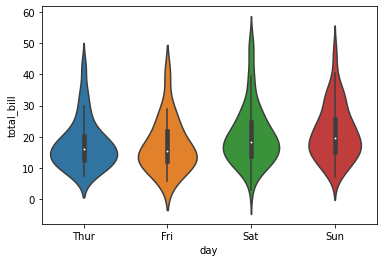

In [ ]:
#seabornでヴァイオリンプロットを描く
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

いかがでしょうか。matplotlibではPandasのDataFrameからリストに直す必要があったり、ラベルを自分で指定する必要があるためコードが長くなっています。一方のseabornはわずか２行のコードで非常に簡単にviolinplotを作成・表示することができます。それに加えてseabornは自動的に見やすい色分けまで行ってくれます。ヴァイオリンの内側部分にも若干の違いがあるのがわかるでしょうか。実はseabornのヴァイオリンの内部にはデータの中央値等の情報が可視化されており、データについてより詳細な情報を得られるようになっています。violinplotについては後ほど詳しく扱いますのでその際に確認しましょう。

**seabornの短所**

このような長所を持つseabornですが、matplotlibの方が優位な点も存在します。それは、matplotlibの方がユーザーが多い点です。以下のGoogle Trendsでのリサーチ結果をご覧下さい。一つ目が日本における人気度、二つ目がすべての国における人気度を表す折れ線グラフです。

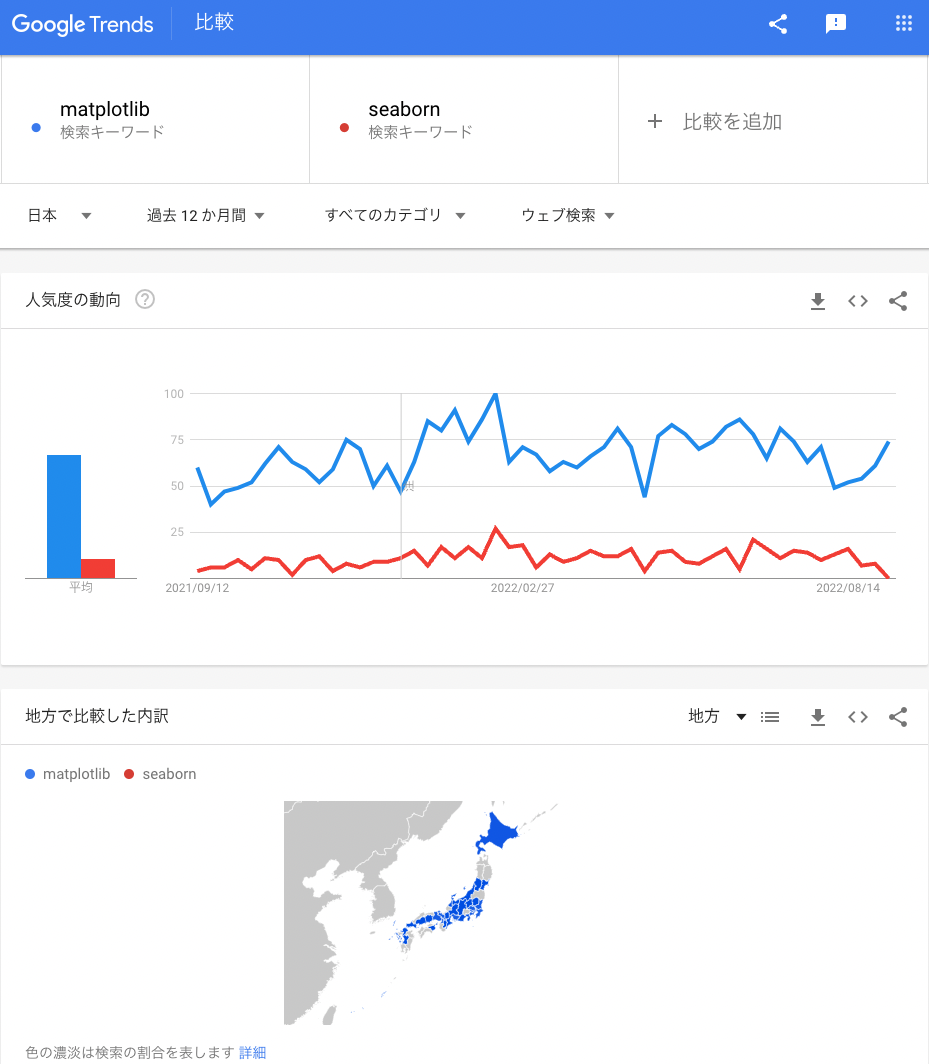

これらの図から、日本においても世界全体で見ても、matplotlibの方がGoogle Trends上での人気が高いことがお分かりいただけたかと思います。そして、一般的にユーザーが多ければ多いほど、使っていて困った際に、参考にできるインターネット上の情報量が多いと考えられます。以上がseabornの概要と特徴です。ユーザー数やインターネット上の情報量ではmatplotlibに軍配があがる可能性が高いですが、seabornにはそれを補って余りある利便性がある事がお分かりいただけたかと思います。それでは、いよいよseabornをインストールして、データ可視化を実装していきましょう。

seabornのインストール
seabornの特徴はお分かりいただけたでしょうか。それでは、seaborn公式ドキュメント(https://seaborn.pydata.org/installing.html
)を参考にseabornをインストールしましょう。


# seabornによるデータ可視化入門
それでは、実際にデータを用いてseabornを使っていきましょう。まず、必要なライブラリを読み込みます。外部ライブラリを読み込む際にはimportを用います。 また、ライブラリをインポートするとき、任意の名前をつけてインポートすることが可能です。その際には as の後に名前を指定します。 慣習的にmatplotlibは plt として、seabornは sns で読み込むことが多いため、ここでもそのようにしてインポートします。数値計算を行うためのライブラリであるNumpy（ナンパイもしくはナムパイ）は np として、表のようなデータを扱うPandas（パンダス）ライブラリは pd としてインポートします。

In [ ]:
# ライブラリとデータを用意する
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

次に、可視化するデータを用意します。seabornはいくつかのデータセットを用意しており、それらはsns.load_dataset で使用することができます。ここでは有名な、kaggleのTitanicデータセットを使用します。それではtitanicデータセットを変数 df に代入します。


In [ ]:
#titanicデータセットを変数dfに代入
df = sns.load_dataset('titanic')

In [ ]:
#dfの先頭から5行を確認
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#dfの先頭から5行を確認


# titanicデータを可視化する

**目次**

1.   棒グラフを描く
2.   ヒストグラムを描く
3.   箱ひげ図を描く
4.   棒グラフで平均値を可視化する
5.   scatter plotを描く
6.   ヴァイオリンプロットを描く
7.   散布図を描く
8.   散布図行列を描く


## 棒グラフを描く　−複数の項目の値を比較する−
可視化を始める前に、sns.catplot というメソッドについて説明します。sns.catplot は、性別(sex)ごとに年齢(age)の分布を見るというように、カテゴリごとに分布を比較する場合に用います。また、sns.catplot には何種類もの可視化手法がまとめられており、kind=(種類) で用いたい手法を指定することが可能です。本稿では、sns.catplot を駆使して、様々な可視化を行なっていきます。

では早速、sns.catplot で棒グラフを描きましょう。x に可視化したい変量を指定し、data にその変量をもつデータフレームを指定します。そして、棒グラフを描く際には kind=”count” を指定します。複数の項目の値を比較したいときに用いると良いでしょう。なお、上述のように、seabornはグラフを自動で色分けしてくれるため見栄えの良い棒グラフを簡単に描くことができます

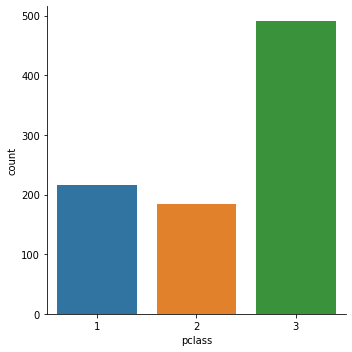

In [ ]:
#sns.catplotで棒グラフを描く
sns.catplot(x="pclass", data=df, kind="count")

## ヒストグラムを描く　−ひとつの変量の分布を可視化する−
ヒストグラムとは、ある一つの変量を複数の階級（bin）に分け、それぞれの階級にいくつのデータが含まれるのかを棒グラフの形で表現したものです。ひとつの変量の分布を確認したい際に用いると有効です。では、上の df でage（年齢）の分布の様子を知るために、ヒストグラムを描いてみましょう。ヒストグラムを描くには、sns.distplot を用います。sns.distplot の引数には、PandasのSeries、Numpyの1d-array、もしくはPythonのリストを指定します。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


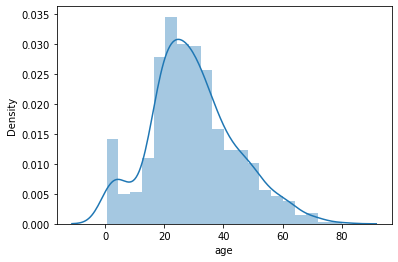

In [ ]:
#sns.distplotでヒストグラムを描く
sns.distplot(df['age'])
plt.show()
 

このグラフから、20代前半の人が最も多いことがわかりますね。今回のヒストグラムは幅4、全部で20の階級（bin）を持っています。階級の数は、指定しなければ自動的に決まりますが、bins=（数値）として指定することもできます。また、ここに引かれている青色の線は、KDE（カーネル密度推定）と呼ばれる手法で計算された、確率密度関数を表します。確率密度関数が不要であれば、kde=False を指定します。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


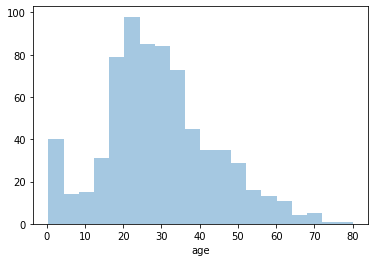

In [ ]:
#確率密度関数を除き、ヒストグラムのみを描く
sns.distplot(df['age'], kde=False)
plt.show()

## 箱ひげ図を描く　−基本統計量を可視化する−
ここでは、箱ひげ図を用いてデータを可視化します。しかし、その前に箱ひげ図でどのようなデータを可視化できるのかを確認しましょう。以下が箱ひげ図の例です。

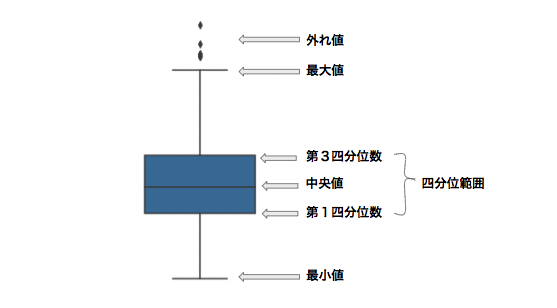

図のように、多くの基本統計量を可視化できるのが箱ひげ図の特徴です。第１四分位数、中央値（＝第２四分位数）、第３四分位数は、それぞれデータを小さい方から並べたときに、全体の25％、50％、75%にあたるデータの位置を示しています。第１四分位数から第３四分位数までの範囲を、四分位範囲といいます。また、seabornのデフォルトでは、四分位範囲の1.5倍の長さ以上、四分位範囲から離れた点は外れ値とみなし、外れ値ではない最も外側の点までがいわゆるひげとなります。（ゆえに、上の図の最大値は厳密には最大値ではありません。）

箱ひげ図の特徴がわかったところで、早速箱ひげ図を用いて可視化しましょう。箱ひげ図による可視化にも、sns.catplotを用います。箱ひげ図を描く際には、kind=’box’ を指定します。さらに、hue=(ラベルを含むカラム名) を指定することで、ラベルごとの分布を見ることができます。今回は survived(1:生存、0:死亡) を hue に指定します。

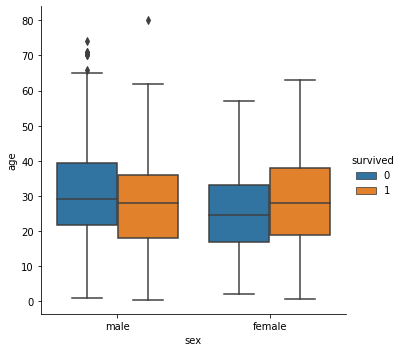

In [ ]:
#sns.catplotで箱ひげ図を描く
sns.catplot(x='sex', y='age', data=df, kind='box', hue='survived')
plt.show()

また、kind=’boxen’ と指定することで、より詳細な情報を得られる表示方法に変えることもできます。

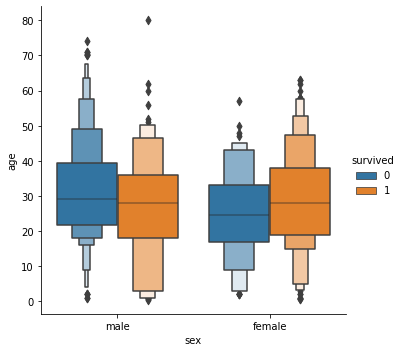

In [ ]:
#kind='boxen'と指定
sns.catplot(x='sex', y='age', data=df, kind='boxen', hue='survived')
plt.show()

この図をみると、例えば男性は若い人の方が多く助かっているのに対し、女性は助かった人の年齢層が助からなかった人の年齢層よりも全体的に高いことが読み取れます。

## 棒グラフを描く　−平均値を可視化する−
カテゴリーごとの平均値のみに興味があるのであれば、sns.catplot で kind=’bar’ を指定することで棒グラフを用いて平均値の比較をすることができます。また、デフォルトでは平均値を比較しますが、estimator=np.median とすれば中央値の比較も可能です。

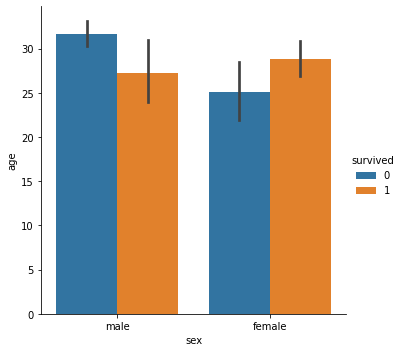

In [ ]:
#平均値を可視化して比較
sns.catplot(x='sex', y='age', data=df, kind='bar', hue='survived')
plt.show()

ここで、棒グラフの上の方に描かれる黒い線は、error barを示し、デフォルトでは95%信頼区間になっています。ここでいう95%信頼区間とは、95%の確率で平均値がこの部分に含まれるという範囲のことです。

##scatter plotを描く　−分布を詳細に表示する−
この項目では、ひとつのデータをひとつの点として表示する scatter plot の図を二つ紹介します。ひとつ目が以下の strip plot です。なお、これは、catplot のデフォルトの表示形式なので、kind の指定は不要です。

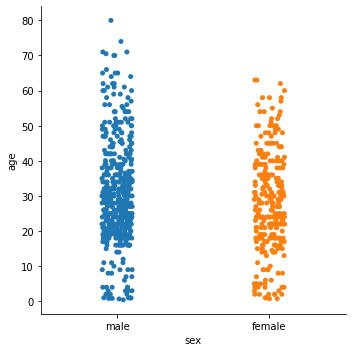

In [ ]:
#strip plotの表示
sns.catplot(x='sex', y='age', data=df)
plt.show()

しかし、多くの点が集中してしまい、分布が確認しづらくなってしまっている箇所がありますね。そんな時には、次の swarm plot を用いましょう。kind=’swarm’ と指定することで表示できます。

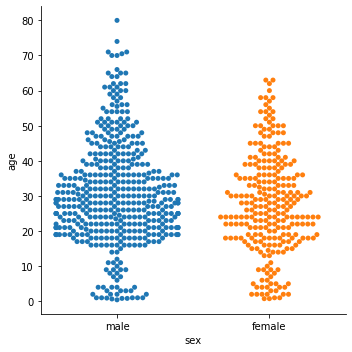

In [ ]:
#swarm plotの表示
sns.catplot(x='sex', y='age', data=df, kind='swarm')
plt.show()

さらに、ここでも先程と同様に、hue=(ラベルを含むカラム名) を指定することで、ラベルごとの分布を見てみましょう。今回も survived(1:生存、0:死亡) を hue に指定します。


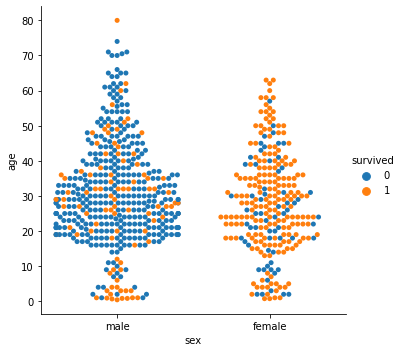

In [ ]:
#ラベルごとに分けて表示
sns.catplot(x='sex', y='age', data=df, kind='swarm', hue='survived')
plt.show()

女性は生存の割合が高く、男性は10歳以下での生存の割合が高いことがわかります。

## ヴァイオリンプロットを描く　−scatter plotを滑らかにし、箱ひげ図を加える−
前述の箱ひげ図は中央値や最大値、最小値を比較するのに向いていますが、分布の様子を比較することはできません。また、scatter plot の雑多な見た目があまり好みでない方もいるのではないでしょうか。これらの課題をまとめて克服している手法が、以下のヴァイオリンプロットです。ヴァイオリンプロットを表示するためには、sns.catplot において、kind=’violin’ を指定します。

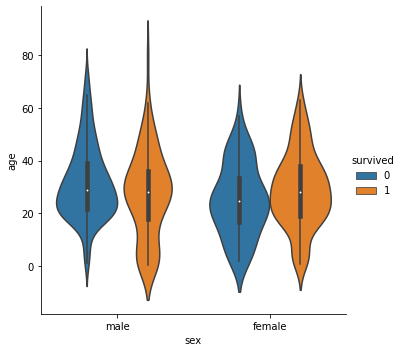

In [ ]:
#ヴァイオリンプロットを描く
sns.catplot(x='sex', y='age', data=df, kind='violin', hue='survived')
plt.show() 

バイオリンの形状はヒストグラムの箇所で一度出てきたKDE（カーネル密度推定）による確率密度関数を表しており、バイオリンの中心部分には簡略化された箱ひげ図が描かれています。 split=True を指定すると、hue をラベルごとに結合させた形にすることができます。

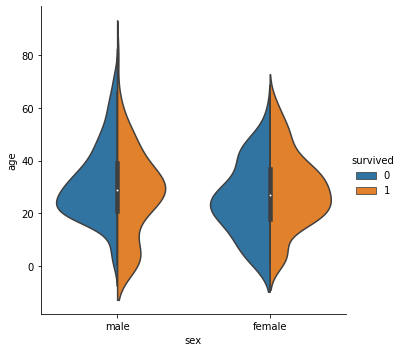

In [ ]:
#hueをラベルごとに結合して表示
sns.catplot(x='sex', y='age', data=df, kind='violin', hue='survived', split=True)
plt.show()

## 散布図を描く　−二つの数量データの関係を可視化する−
年齢(age)と運賃(fare)のように2つの数量データの関係性をみるには散布図を利用します。散布図は、横軸と縦軸それぞれに1つずつ変量を対応させ、各データをプロットしたものです。散布図は、sns.scatterplot で描くことができ、引数は以下のように指定します。

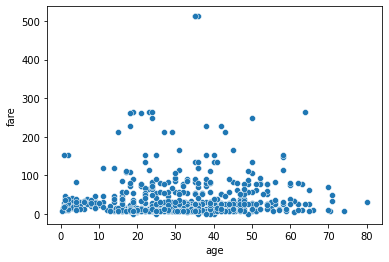

In [ ]:
#散布図を描く
sns.scatterplot(x='age', y='fare', data=df)
plt.show()

また、散布図の上と右に、各変量のヒストグラムを併せて表示する方法として、sns.jointplot があります。各々の変数単独の分布を同時に確認できるのが特徴です。上の散布図では、データ数が多く、散布図上でデータが密集して見づらくなっていました。このような場合には、引数に kind=’hex’ を指定して、データの密度を色の濃淡で表現するようにすると良いでしょう。

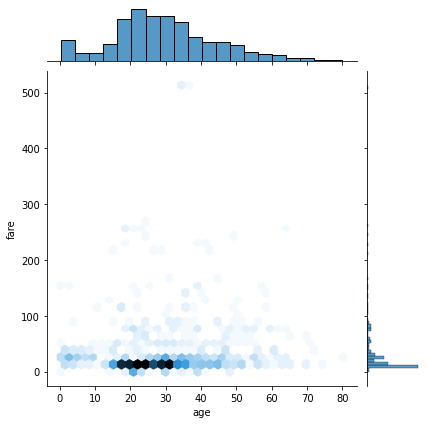

In [ ]:
#散布図とヒストグラムを併せて表示する
sns.jointplot(x='age', y='fare', data=df, kind='hex')
plt.show()

このようにしてみると、年齢が20歳から30歳位で、安いチケットを持っている乗客が多いことや、高いチケットを持っている乗客がかなり少ないことが簡単にわかります。



## 散布図行列を描く　−全ての変量の組の関係を可視化する−
先ほど見たように、sns.scatterplot を用いることで2つの変量の散布図を描くことができますが、関係性を確かめたい変量がいつも2つしかないとは限りません。3つ以上の変量がある場合に、それぞれの関係を1組ずつ可視化するのは面倒ですよね。そんなときには sns.pairplot を用いることでまとめて散布図を描くことができます。各散布図は行列の形式に並べられており、これを散布図行列と呼びます。データに多くの変量が含まれている場合、個別の散布図を描く前に sns.pairplot で散布図をみると、どの変量間の関係性が重要そうであるか見当をつけることができます。

それでは、散布図行列を描いてみましょう。ここでは、titanicデータセットより変量の少ないirisデータセットを使用します。このデータセットは、アヤメ(Iris)という花の3品種(setosa、versicolor、virginica)について、それぞれ以下の項目を測定したものです。<br>

– sepal_length（がくの長さ）<br>
– sepal_width（がくの幅）<br>
– petal_length（花弁の長さ）<br>
– petal_width（花弁の幅）<br>

irisデータセットはseabornが用意しているものを使用するため sns.load_dataset で読み込みこれを変数 df2 に代入します。

In [ ]:
#irisデータセットを読み込んで表示
df2 = sns.load_dataset('iris')
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


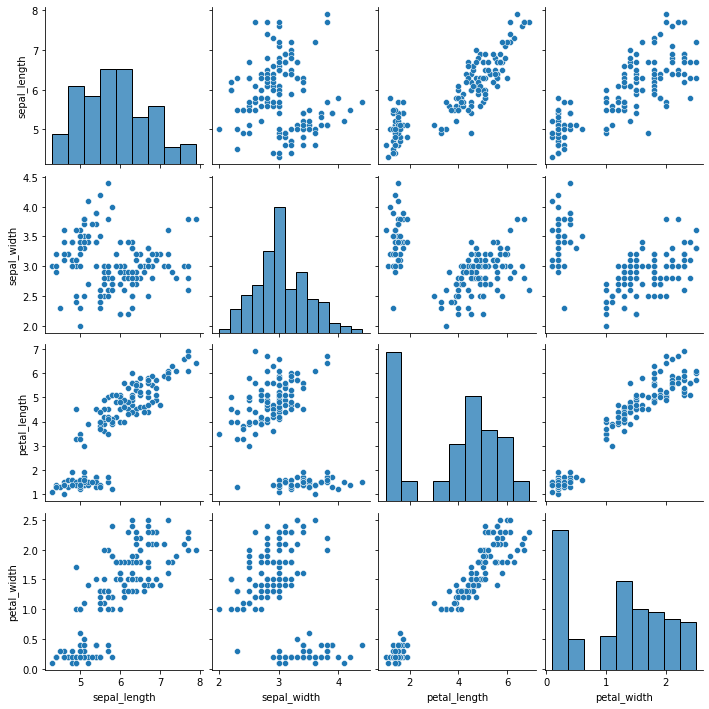

In [ ]:
#全ての２変数の組み合わせで散布図を表示
sns.pairplot(df2)
plt.show()

全ての変量の組み合わせについて散布図が描かれているのがわかると思います。また、対角線上（散布図行列の対角成分）にはそれぞれの変量についてのヒストグラムが描かれています。さらに、引数に hue=(ラベルを含むカラム名) を指定することで、ラベル毎に色分けして散布の様子を確認することができます。今回の場合、アヤメの種類ラベルを含むカラムはspecies であるため、これを指定します。

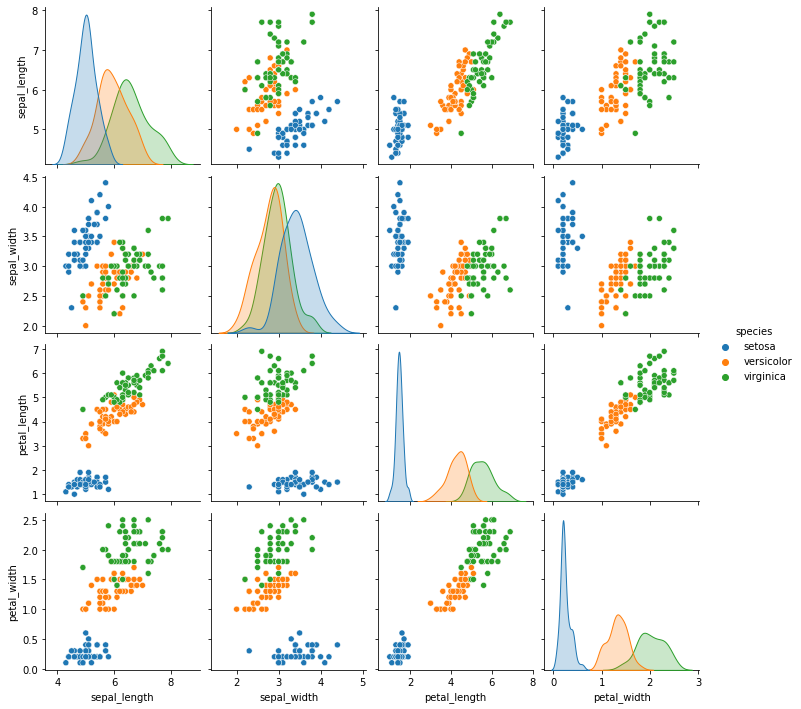

In [ ]:
#ラベルごとに色分けして表示
sns.pairplot(data=df2, hue='species')
plt.show()

これで、種類毎に分布の様子を見ることができました。この散布図行列だけでも、様々な知見を得られそうです。

## まとめ

いかがでしたか？本稿に載せた数々のコードと図から、seabornがいかに優れたライブラリであるかをお分かりいただけたと思います。しかし、本稿でご紹介したのはごく一部の可視化手法に過ぎません。seabornを使いこなせば、以下のような多種多様な図を描く事ができます。
<br>
https://seaborn.pydata.org/examples/index.html


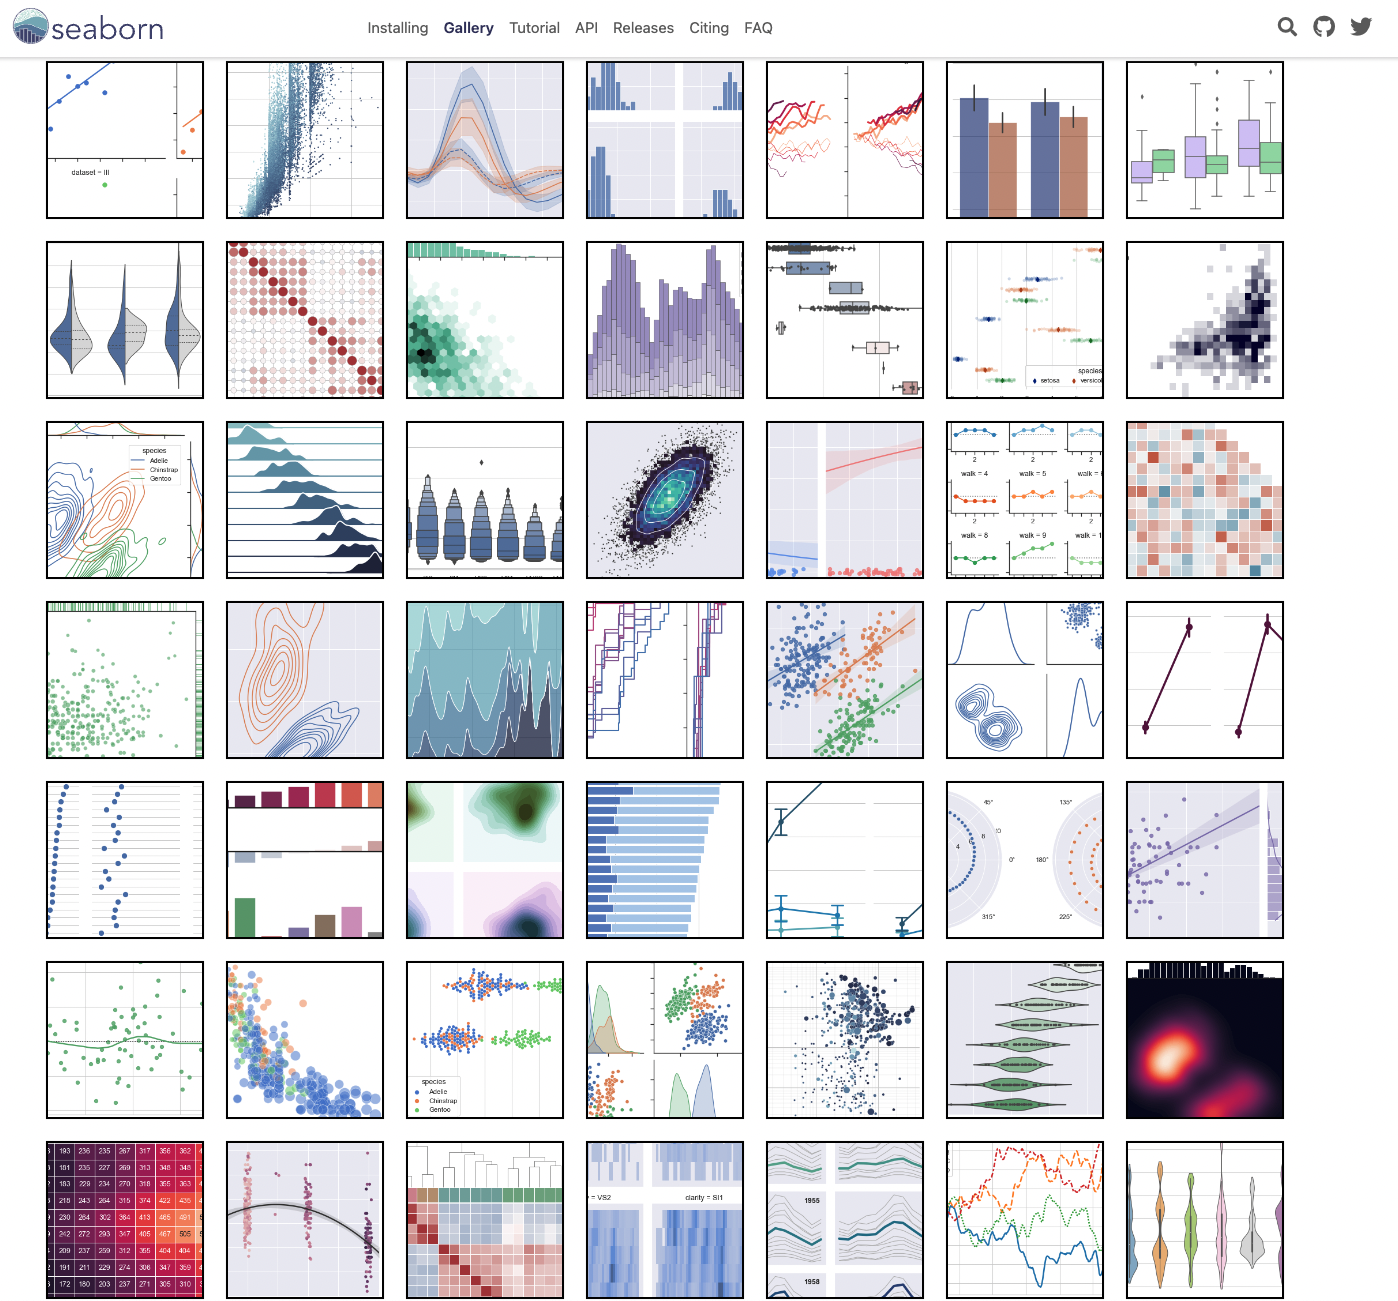